## Loading and preprocessing data

In [1]:
import pandas as pd
import tensorflow.keras.optimizers

In [2]:
from kerastuner.tuners import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [3]:
import time
LOG_DIR = f"{int(time.time())}"

In [4]:
data = pd.read_json('train.json')
data.head()

,id,band_1,band_2,inc_angle,is_iceberg
0,dfd5f913,"[-27.878360999999998, -27.15416, -28.668615, -...","[-27.154118, -29.537888, -31.0306, -32.190483,...",43.9239,0
1,e25388fd,"[-12.242375, -14.920304999999999, -14.920363, ...","[-31.506321, -27.984554, -26.645678, -23.76760...",38.1562,0
2,58b2aaa0,"[-24.603676, -24.603714, -24.871029, -23.15277...","[-24.870956, -24.092632, -20.653963, -19.41104...",45.2859,1
3,4cfc3a18,"[-22.454607, -23.082819, -23.998013, -23.99805...","[-27.889421, -27.519794, -27.165262, -29.10350...",43.8306,0
4,271f93f4,"[-26.006956, -23.164886, -23.164886, -26.89116...","[-27.206915, -30.259186, -30.259186, -23.16495...",35.6256,0


In [5]:
X = data.iloc[:, 1:3].values

In [6]:
bd1 = [X[i][0] for i in range(len(X))]
bd2 =  [X[i][1] for i in range(len(X))]

In [7]:
import numpy as np

## 3 bands inorder to represent the image in 3 channels format with 3rd band as the average of 1st and 2nd band

In [8]:
bd1 = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in bd1])

In [9]:
bd2=  np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in bd2])

In [10]:
bd3 = (bd1 + bd2)/2.0

## Stacking 3 channels to form a 3 channel image

In [11]:
imgs = np.concatenate([bd1[:, :, :, np.newaxis], bd2[:, :, :, np.newaxis], bd3[:, :, :, np.newaxis]], axis=-1) 

In [12]:
 import matplotlib.pyplot as plt

## Rescalling the decimel values of the SAR images to 0 - 1

In [13]:
bd1dn = [np.array(np.exp((np.array(X[i][0])/20))) for i in range(len(X))]
bd2dn = [np.array(np.exp((np.array(X[i][1])/20))) for i in range(len(X))]
bd1dn = np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in bd1dn])
bd2dn=  np.array([np.array(band).astype(np.float32).reshape(75, 75) for band in bd2dn])
bd3dn = (bd1dn + bd2dn)/2.0
imgsdn = np.concatenate([bd1dn[:, :, :, np.newaxis], bd2dn[:, :, :, np.newaxis], bd3dn[:, :, :, np.newaxis]], axis=-1) 

In [14]:
imgsdn[0]

array([[[0.24810132, 0.25725025, 0.25267577],
        [0.2572497 , 0.22834574, 0.24279773],
        [0.23848931, 0.21192348, 0.2252064 ],
        ...,
        [0.27840617, 0.23345512, 0.25593066],
        [0.26595354, 0.2283116 , 0.24713257],
        [0.21754476, 0.25269088, 0.23511782]],

       [[0.23849033, 0.21192434, 0.22520733],
        [0.24810083, 0.18703365, 0.21756724],
        [0.25272867, 0.206066  , 0.22939733],
        ...,
        [0.26595408, 0.18007123, 0.22301266],
        [0.23845418, 0.24332073, 0.24088746],
        [0.2060352 , 0.26595297, 0.23599409]],

       [[0.23849033, 0.18703407, 0.2127622 ],
        [0.2572497 , 0.15683548, 0.2070426 ],
        [0.27437702, 0.206066  , 0.2402215 ],
        ...,
        [0.25721183, 0.20603603, 0.23162393],
        [0.24806371, 0.19995369, 0.22400871],
        [0.19362031, 0.22831112, 0.21096572]],

       ...,

       [[0.23348318, 0.24809402, 0.24078861],
        [0.23848279, 0.2480935 , 0.24328814],
        [0.21757089, 0

In [15]:
import matplotlib.pyplot as plt

## Visualising the images with matplotlib

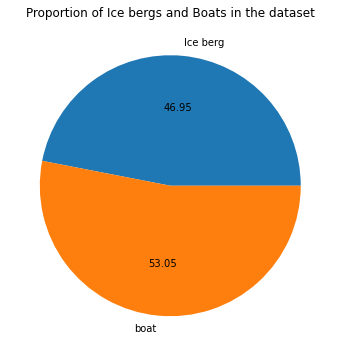

In [16]:
mask1 = data.is_iceberg==1
mask2 = data.is_iceberg == 0
plt.figure(figsize = (8,6))
ice_berg =data.is_iceberg[mask1]
plt.title('Proportion of Ice bergs and Boats in the dataset')
boat = data.is_iceberg[mask2]
plt.pie([len(ice_berg), len(boat)], labels = ['Ice berg', 'boat'],autopct='%.2f')
plt.show()

Text(0.5, 1.0, 'glacier before normalizing the pixel values')

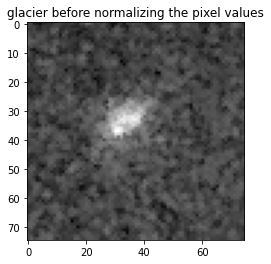

In [17]:
plt.imshow(bd1[5],zorder = 1, cmap = 'gray') #band 1 image
plt.title('glacier before normalizing the pixel values')


Text(0.5, 1.0, 'glacier after normalizing the pixel values')

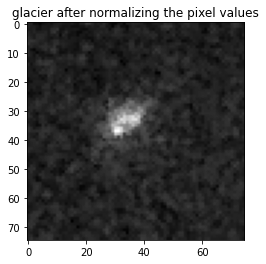

In [18]:
plt.imshow(bd1dn[5], zorder=1, cmap = 'gray') #band1 image after rescalling
plt.title('glacier after normalizing the pixel values')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


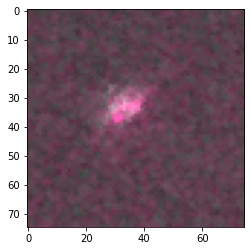

In [19]:
plt.imshow(imgsdn[5], zorder = 1) #3 channel image after rescalling

In [20]:
X_imgdn_train = imgsdn[0:1000]
X_imgdn_test = imgsdn[1000:]

y_imgdn = data.is_iceberg

In [21]:
y_imgdn_train=y_imgdn[:1000].values.reshape(-1,1)
y_imgdn_test=y_imgdn[1000:].values.reshape(-1,1)


In [22]:
y_imgdn_train.shape
y_imgdn_test.shape

(604, 1)

In [23]:
y_imgdn.shape

(1604,)

## Removing speckle with Median Filter

In [24]:
import cv2
l = []

for i in range(len(imgsdn)):
    
    median = cv2.medianBlur(imgsdn[i],5)
    l.append(median)
np.array(l)
filteredimgsdn =np.array(l)
X_filtered_imgdn = filteredimgsdn
X_filtered_imgdn_train = X_filtered_imgdn[:1000]
X_filtered_imgdn_test = X_filtered_imgdn[1000:]
    

## Images before and after removing the Speckling

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image of Ship before removing the Speckle')

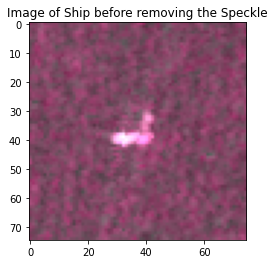

In [25]:
plt.imshow(imgsdn[1])
plt.title('Image of Ship before removing the Speckle')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Image of ship after removing the speckle')

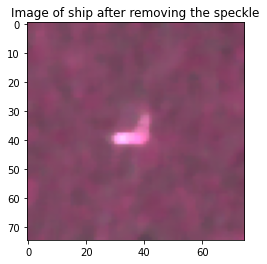

In [26]:
plt.imshow(X_filtered_imgdn_train[1])
plt.title('Image of ship after removing the speckle')

In [27]:
from tensorflow.keras import Sequential
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Conv2D, MaxPooling2D, Dropout, Flatten
from tensorflow.keras.callbacks import TensorBoard

## Building the model and tuning the hyperparameters

In [28]:


# def build_model(hp):
    
#     gmodel=Sequential()
    
#     #Conv Layer 1
#     gmodel.add(Conv2D(hp.Int('input_units',min_value=32, max_value = 256, step=32), kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
#     gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
#     gmodel.add(Dropout(0.2))

#     #Conv Layer 2
#     for i in range(hp.Int('n_layers', 1, 4)):
#         gmodel.add(Conv2D(hp.Int(f'conv_{i}_units',min_value=32, max_value = 256, step=32), kernel_size=(3, 3), activation='relu' ))
#         #gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
#         gmodel.add(Dropout(0.2))



#     #Flatten the data for upcoming dense layers
#     gmodel.add(Flatten())

#     #Dense Layers
#     gmodel.add(Dense(512))
#     gmodel.add(Activation('relu'))
#     gmodel.add(Dropout(0.2))

    

#     #Sigmoid Layer
#     gmodel.add(Dense(1))
#     gmodel.add(Activation('sigmoid'))
    
#     mypotim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
#     gmodel.compile(loss = 'binary_crossentropy', optimizer = mypotim, metrics = ['acc'])

#     return gmodel

In [29]:
# tuner = RandomSearch(build_model, objective='val_acc', max_trials=3, executions_per_trial = 1,
#                      directory = LOG_DIR)

In [30]:
# tuner.search(x = X_filtered_imgdn_train,y = y_imgdn_train, epochs = 2, batch_size = 300, validation_data = (X_filtered_imgdn_test[:100], y_imgdn_test[:100]))

In [31]:
# tuner.get_best_hyperparameters()[0].values

In [32]:
#tuner.results_summary()

## Model after tuning  parameters

In [33]:
def optimized_model():
    gmodel = Sequential()
    
    #Conv Layer 1
    gmodel.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(75, 75, 3)))
    gmodel.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 2
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu' ))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 3
    gmodel.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Conv Layer 4
    gmodel.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
    gmodel.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    gmodel.add(Dropout(0.2))

    #Flatten the data for upcoming dense layers
    gmodel.add(Flatten())

    #Dense Layers 1
    gmodel.add(Dense(512))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Dense Layer 2
    gmodel.add(Dense(256))
    gmodel.add(Activation('relu'))
    gmodel.add(Dropout(0.2))

    #Sigmoid Layer
    gmodel.add(Dense(1))
    gmodel.add(Activation('sigmoid'))
    
    return gmodel


In [34]:
gmodel = optimized_model()

In [35]:
Name =  'iceberg vs boat-{}'.format(int(time.time()))

In [36]:
tensorboard = TensorBoard(log_dir = 'loggnr618\\{}'.format(Name))

In [37]:
mypotim=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
gmodel.compile(loss = 'binary_crossentropy', optimizer = mypotim, metrics = ['acc'])


In [38]:
gmodel.fit(x = X_filtered_imgdn_train,y = y_imgdn_train, epochs = 10, batch_size = 300, validation_data = (X_filtered_imgdn_test,
                                                                                                          y_imgdn_test), callbacks = [tensorboard])

Train on 1000 samples, validate on 604 samples
Epoch 1/10
1000/1000 [==============================] - ETA: 1:27 - loss: 0.6919 - acc: 0.480 - ETA: 38s - loss: 0.7079 - acc: 0.471 - ETA: 8s - loss: 0.7025 - acc: 0.4733 - 88s 88ms/sample - loss: 0.7015 - acc: 0.4800 - val_loss: 0.6988 - val_acc: 0.3990
Epoch 2/10
1000/1000 [==============================] - ETA: 36s - loss: 0.6945 - acc: 0.50 - ETA: 23s - loss: 0.6932 - acc: 0.51 - ETA: 6s - loss: 0.6927 - acc: 0.5211 - 80s 80ms/sample - loss: 0.6925 - acc: 0.5250 - val_loss: 0.6904 - val_acc: 0.5911
Epoch 3/10
1000/1000 [==============================] - ETA: 42s - loss: 0.6867 - acc: 0.51 - ETA: 25s - loss: 0.6865 - acc: 0.50 - ETA: 6s - loss: 0.6861 - acc: 0.4956 - 69s 69ms/sample - loss: 0.6871 - acc: 0.4910 - val_loss: 0.6798 - val_acc: 0.5199
Epoch 4/10
1000/1000 [==============================] - ETA: 40s - loss: 0.6801 - acc: 0.48 - ETA: 24s - loss: 0.6793 - acc: 0.49 - ETA: 6s - loss: 0.6764 - acc: 0.5256 - 68s 68ms/sample - lo

## Saving and Evaluating the Model

In [39]:
#gmodel.save('gnr618_iceberg vs ships cnn model')

In [40]:
#gmodel.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 36, 36, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 128)       1

In [41]:
#gmodel.predict(X_filtered_imgdn_train)[5]
#X_filtered_imgdn_train[5].shape

(75, 75, 3)

In [42]:
#y_imgdn_train[5]

array([1], dtype=int64)

In [43]:
#validation_loss, validation_accuracy =gmodel.evaluate(X_filtered_imgdn_test,y_imgdn_test)

604/604 [==============================] - ETA: 7s - loss: 0.4512 - acc: 0.750 - ETA: 8s - loss: 0.4732 - acc: 0.734 - ETA: 7s - loss: 0.4991 - acc: 0.729 - ETA: 6s - loss: 0.4900 - acc: 0.726 - ETA: 6s - loss: 0.4917 - acc: 0.725 - ETA: 6s - loss: 0.4733 - acc: 0.744 - ETA: 5s - loss: 0.4672 - acc: 0.754 - ETA: 5s - loss: 0.4615 - acc: 0.761 - ETA: 4s - loss: 0.4620 - acc: 0.756 - ETA: 4s - loss: 0.4613 - acc: 0.756 - ETA: 3s - loss: 0.4669 - acc: 0.755 - ETA: 3s - loss: 0.4634 - acc: 0.760 - ETA: 2s - loss: 0.4633 - acc: 0.759 - ETA: 2s - loss: 0.4643 - acc: 0.758 - ETA: 1s - loss: 0.4598 - acc: 0.762 - ETA: 1s - loss: 0.4601 - acc: 0.765 - ETA: 0s - loss: 0.4692 - acc: 0.750 - ETA: 0s - loss: 0.4936 - acc: 0.722 - 9s 15ms/sample - loss: 0.5008 - acc: 0.7119


## Validation loss and accuracy

In [44]:
# print(f'Validation Loss - {validation_loss}')
# print(f'Validation Accuracy - {validation_accuracy}')

Validation Loss - 0.5007522212748496
Validation Accuracy - 0.7119205594062805


In [45]:
# from sklearn.metrics import classification_report
# k =gmodel.predict(X_filtered_imgdn_test)
# for i in range(len(k)):
#     if k[i]>0.5:
#         k[i] = 1
#     else:
#         k[i] = 0

In [46]:
# print(classification_report(k, y_imgdn_test))

              precision    recall  f1-score   support

         0.0       0.55      0.96      0.69       207
         1.0       0.96      0.58      0.73       397

    accuracy                           0.71       604
   macro avg       0.75      0.77      0.71       604
weighted avg       0.82      0.71      0.72       604



In [47]:
import numpy as np 
import matplotlib.pyplot as plt

In [48]:
i = plt.imread('gggggg.jpg')

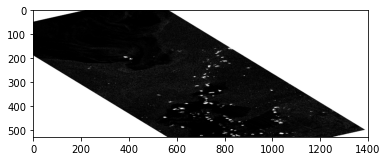

In [49]:
plt.imshow(i)

In [50]:
i.shape

(530, 1401, 3)

In [51]:
imag = np.array(i)

In [52]:
imag

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [53]:
import cv2

In [54]:
resizeimg = cv2.resize(i, (75, 75))

In [55]:
resizeimg

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [56]:
imgresizearray = np.array(resizeimg)

In [57]:
imgresizearray

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [58]:
image = np.expand_dims(resizeimg, axis=0)
gmodel.predict(image)

array([[0.]], dtype=float32)

In [59]:
image.shape

(1, 75, 75, 3)